<font color='#f6f6f6'>██████████████████████████████████████████████████████████████████████████████████████████████</font>

### Hydrogen Wavefunctions - Electron probability density plots

Modeling and visualization of solutions for the hydrogen atom wavefunction and electron probability density plots.

In [1]:
# Author: Sebastian Mag. | Date: Oct 04/2022
# Source code: https://github.com/cmd098/hydrogen-wavefunctions

#### Requirements | Importing libraries

In [2]:
import matplotlib, matplotlib.pyplot as plt
import scipy, scipy.special as sp
import seaborn as sns
import numpy as np

In [3]:
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('NumPy', np.__version__)
print('SciPy', scipy.__version__)

Matplotlib 3.6.0
Seaborn 0.12.0
NumPy 1.23.3
SciPy 1.9.1


In [4]:
# Set custom matplotlib default font
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

<font color='#f6f6f6'>██████████████████████████████████████████████████████████████████████████████████████████████</font>

#### 1. Describing a radial function $R_{nl}(r)$

<img src='img/radial_function.png' width=470 align="left"/>

In [5]:
# Rnl(r) normalized radial function

def radial_function(n, l, r, a0):
    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
    p = 2 * r / (n * a0)

    return np.sqrt(
        ((2 / n * a0) ** 3 * (np.math.factorial(n - l - 1))) / (2 * n * (np.math.factorial(n + l)))
    ) * np.exp(-p / 2) * (p ** l) * laguerre(p)

#### 2. Describing an angular function | Spherical harmonic $Y_{l}^{m}(\theta, \varphi)$

<img src='img/angular_function.png' width=460 align="left"/>

In [6]:
# Ylm(θ,φ) normalized angular function 

def angular_function(m, l, theta, phi):
    legendre = sp.lpmv(m, l, np.cos(theta))

    return ((-1) ** m) * np.sqrt(
        ((2 * l + 1) * np.math.factorial(l - np.abs(m)))
        / (4 * np.pi * np.math.factorial(l + np.abs(m)))) * legendre * np.real(np.exp(1.j * m * phi))

#### 3. Describing the normalized wavefunction $\psi _{nlm}(r,\theta ,\varphi)$ as a product of  $R_{nl}(r)\cdot Y_{l}^{m}(\theta, \varphi)$

<img src='img/normalized_wf.png' width=540 align="left"/>

In [7]:
# Ψnlm(r,θ,φ) normalized wavefunction 
# by definition of quantum numbers n, l, m and a bohr radius augmentation coefficient

def normalized_wavefunction(n, l, m, a0):

    # Bohr radius (a0) augmentation 
    a0 = 5.29e-11 * (1e+12 * a0)
    
    # Set coordinates grid to assign a certain probability to each point (x, y) in the plane
    x = y = np.linspace(-480, 480, 680)
    x, y = np.meshgrid(x, y)

    # Ψnlm(r,θ,φ) = Rnl(r).Ylm(θ,φ)
    psi = radial_function(n, l, np.sqrt((x ** 2 + y ** 2)), a0) * angular_function(m, l, np.arctan(x / (y + 1e-10)), 0)

    return np.abs(psi) ** 2

#### 4. Producing wavefunction electron probability density plots

In [8]:
# Solving the normalized wavefunction and plotting its electron probability density 

# dark_palette: Displays a plot with less brightness (optional parameter | default: False) 

def plot_wavefunction(n, l, m, a0, dark_palette=False):
    
    fig, ax = plt.subplots()
    
    # Plot probability density figure
    im = ax.imshow(np.sqrt(normalized_wavefunction(n, l, m, a0)), cmap='rocket')
    
    # Add colorbar
    cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
    cbar.set_ticks([])
    
    # Apply dark palette if requested
    if dark_palette:
        fig.patch.set_facecolor('#020419'); cbar.outline.set_visible(False)
        plt.rcParams['text.color']='#dfdfdf'; ax.tick_params(axis='x', colors='#c4c4c4')
        ax.tick_params(axis='y', colors='#c4c4c4')

        ax.spines['top'].set_color('#020419'); ax.spines['right'].set_color('#020419')
        ax.spines['bottom'].set_color('#c4c4c4'); ax.spines['left'].set_color('#c4c4c4')
        ax.set_title('Hydrogen Wavefunction probability density', pad=20, fontsize=15, color='#dfdfdf')  
    else:
        plt.rcParams['text.color']='#000000'; ax.tick_params(axis='x', colors='#000000')
        ax.tick_params(axis='y', colors='#000000')
        ax.set_title('Hydrogen Wavefunction probability density', pad=20, fontsize=15, color='#000000')    
    
    # Add text and labels
    ax.invert_yaxis() 
    ax.text(40, 630, r'$\psi_{{({0}, {1}, {2})}}$'.format(n, l, m), color='#dfdfdf', fontsize=18)
    ax.text(780, 140, 'Particle probability distribution', rotation='vertical', fontsize=13)
    ax.text(780, 660, '+', fontsize=16)
    ax.text(780, 0, '−', fontsize=16)

    # Save and display plot
    plt.savefig(f'wavefunction ({n},{l},{m}).png', dpi=245, bbox_inches='tight', pad_inches=0.3)
    plt.show()

<font color='#f6f6f6'>██████████████████████████████████████████████████████████████████████████████████████████████</font>

###  Implementation | Output:

Light shaded areas in the orbital cross-sections represent a high probability of a particle being present in that region.

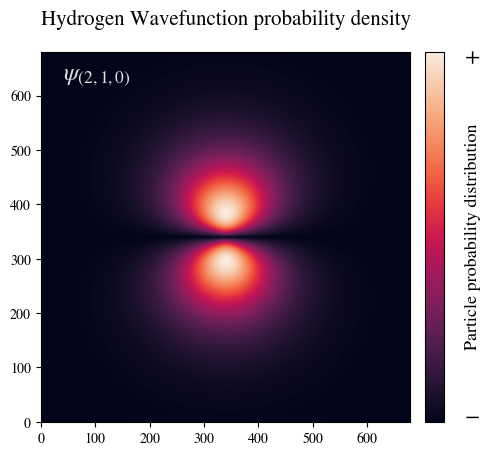

In [9]:
plot_wavefunction(2, 1, 0, 0.6)  # dark_palette=False (default)

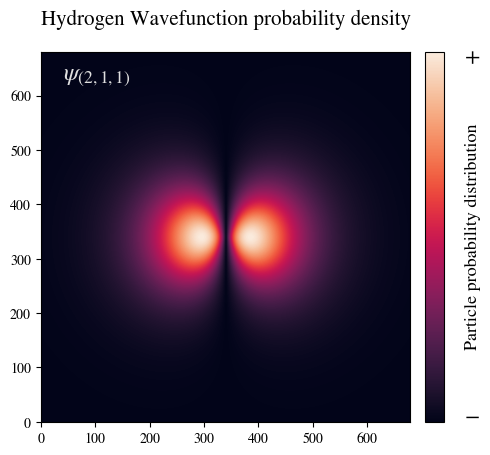

In [10]:
plot_wavefunction(2, 1, 1, 0.6)  # dark_palette=False (default)

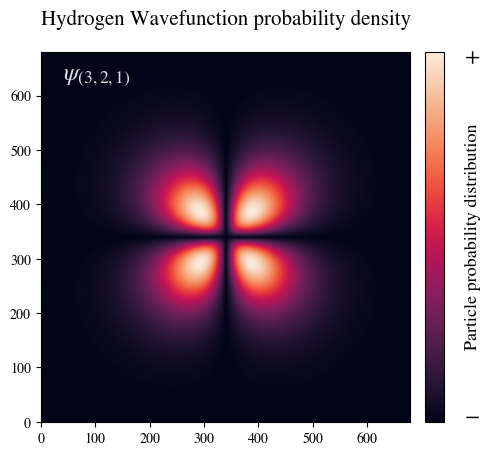

In [11]:
plot_wavefunction(3, 2, 1, 0.3)  # dark_palette=False (default)

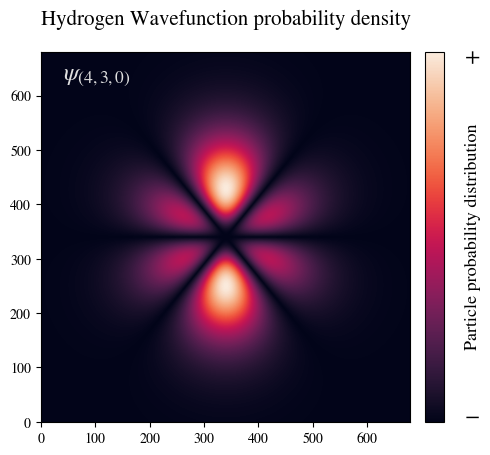

In [12]:
plot_wavefunction(4, 3, 0, 0.2)  # dark_palette=False (default)

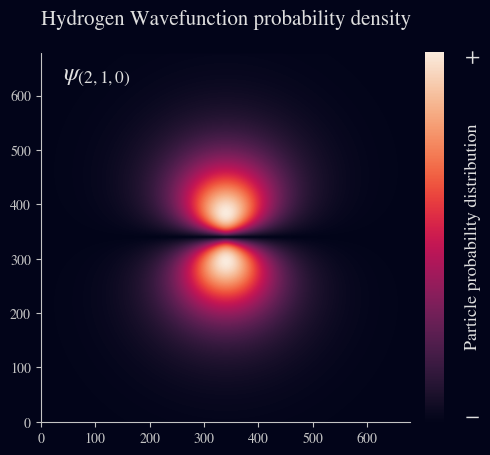

In [13]:
plot_wavefunction(2, 1, 0, 0.6, True)  # dark_palette=True

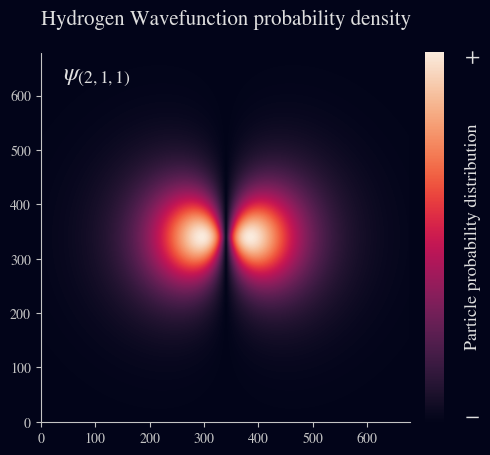

In [14]:
plot_wavefunction(2, 1, 1, 0.6, True)  # dark_palette=True

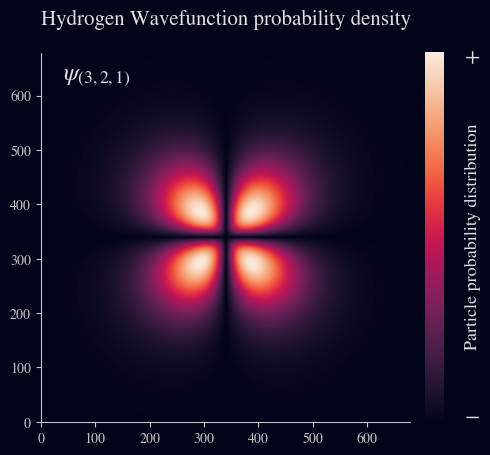

In [15]:
plot_wavefunction(3, 2, 1, 0.3, True)  # dark_palette=True

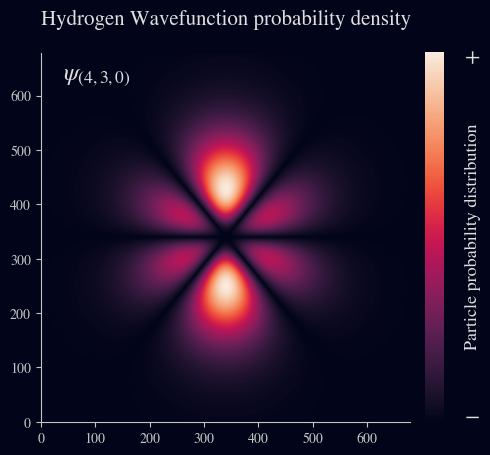

In [16]:
plot_wavefunction(4, 3, 0, 0.2, True)  # dark_palette=True

<font color='#f6f6f6'>██████████████████████████████████████████████████████████████████████████████████████████████</font>